# Final Term Project

## 634851 Data Mining

Professor: Yasser Abduallah

**Date:** July 2024

**Student:** Omnya Mahmoud


# Final Term Project
## Implementing Classification Algorithms on Diabetes Dataset.
## Introduction

The objective of this project is to build a classification model to predict diabetes outcomes using the Pima Indians Diabetes dataset. This dataset is sourced from Kaggle and consists of various medical predictor variables and one target variable (Outcome). The project involves data preprocessing, model building, training, and evaluation.



## Dataset Description

The Pima Indians Diabetes dataset includes several medical predictor variables and one target variable (Outcome). The predictor variables include:
- Pregnancies
- Glucose
- Blood Pressure
- Skin Thickness
- Insulin
- BMI
- Diabetes Pedigree Function
- Age

The target variable is `Outcome`, which indicates whether the patient has diabetes (1) or not (0).


## Import Required Libraries

First, we need to import the necessary libraries. These include `pandas` for data manipulation, `train_test_split` from `sklearn` for splitting the dataset, `RandomForestClassifier` from `sklearn` for building the model, and various metrics for evaluating the model.


In [33]:
# Install necessary libraries
!pip install -q tensorflow scikit-learn keras
!pip install tensorflow scikit-learn


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt





## Load and Inspect the Dataset

Next, we load the dataset and inspect it to understand its structure. We will check the first few rows, column names, and basic statistics, and also identify any missing values.


In [35]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv(next(iter(uploaded.keys())))

print("First few rows of the dataset:")
print(data.head())

print("\nColumn names:")
print(data.columns)

print("\nBasic statistics:")
print(data.describe())

print("\nMissing values per column:")
print(data.isnull().sum())

print("\nData types of each column:")
print(data.dtypes)


Saving diabetes.csv to diabetes (2).csv
First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Column names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Basic statistics:
       Pregnancies     Glucose  Blood

## Preprocess the Data

Before building the model, we need to preprocess the data. This involves splitting the dataset into features and target variables, and then into training and testing sets.


In [63]:
import pandas as pd

# Load dataset
df = pd.read_csv('diabetes.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Display basic statistics of the dataset
print(df.describe())

# Check for missing values and handle them if necessary
data.isnull().sum()

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

## Build and Train the RandomForestClassifier

We will now build and train a Random Forest classifier using the training data.


In [43]:
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=10)
print("Random Forest Scores:", rf_scores)





Random Forest Scores: [0.7012987  0.80519481 0.72727273 0.66233766 0.74025974 0.80519481
 0.79220779 0.84415584 0.69736842 0.80263158]


Deep Learning Algorithm (Neural Network)



In [44]:
def create_model():
    model = Sequential([
        Dense(64, input_dim=X.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def cross_val_score_keras(model_fn, X, y, epochs=10, batch_size=32, cv=10):
    scores = []
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    for train_index, val_index in kfold.split(X):
        model = model_fn()
        model.fit(X[train_index], y[train_index], epochs=epochs, batch_size=batch_size, verbose=0)
        score = model.evaluate(X[val_index], y[val_index], verbose=0)[1]
        scores.append(score)
    return np.array(scores)

nn_scores = cross_val_score_keras(create_model, X.values, y.values, epochs=10, batch_size=32, cv=10)
print("Neural Network Scores:", nn_scores)


Neural Network Scores: [0.70129871 0.64935064 0.55844158 0.67532468 0.58441556 0.62337661
 0.72727275 0.59740257 0.71052629 0.59210527]



Plot Training and Validation Accuracy


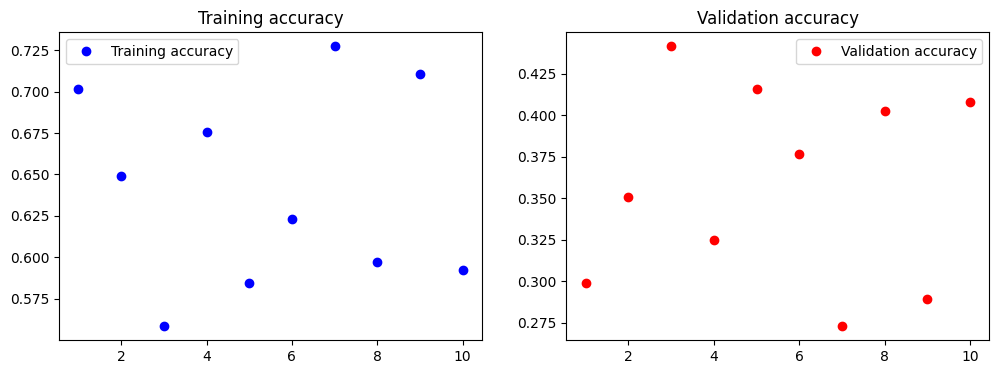

In [45]:
epochs = range(1, 11)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, nn_scores, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, [1 - score for score in nn_scores], 'ro', label='Validation accuracy')
plt.title('Validation accuracy')
plt.legend()

plt.show()


### Plot Training and Validation Accuracy

The plots above show the training and validation accuracy for each epoch during the neural network training process.

- The **Training Accuracy** plot demonstrates how well the model is learning the training data over the epochs.
- The **Validation Accuracy** plot illustrates how well the model is generalizing to unseen data during each epoch.

By comparing these two plots, we can identify if the model is overfitting or underfitting. Ideally, both training and validation accuracies should improve and stabilize as training progresses.



Implement SVM


In [46]:
svm_model = SVC(kernel='linear')
svm_scores = cross_val_score(svm_model, X, y, cv=10)
print("SVM Scores:", svm_scores)


SVM Scores: [0.7012987  0.76623377 0.79220779 0.74025974 0.74025974 0.76623377
 0.80519481 0.79220779 0.75       0.81578947]


LSTM



In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the dataset
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Reshape X to be 3D [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# LSTM model with 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lstm_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_lstm_model((X_train.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    scores = model.evaluate(X_test, y_test, verbose=0)
    lstm_scores.append(scores[1])
print("LSTM 10-fold cross-validation scores:", lstm_scores)
print("LSTM average score:", np.mean(lstm_scores))


LSTM 10-fold cross-validation scores: [0.6623376607894897, 0.7922077775001526, 0.7402597665786743, 0.7532467246055603, 0.7792207598686218, 0.6623376607894897, 0.8051947951316833, 0.7142857313156128, 0.6842105388641357, 0.75]
LSTM average score: 0.7343301415443421


Custom Wrapper Function:



In [57]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.base import BaseEstimator, ClassifierMixin

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, build_fn=None, epochs=10, batch_size=32, verbose=0, **kwargs):
        self.build_fn = build_fn
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.model_ = None
        self.kwargs = kwargs

    def fit(self, X, y):
        self.model_ = self.build_fn(**self.kwargs)
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)
        return self

    def predict(self, X):
        return (self.model_.predict(X) > 0.5).astype("int32")


Model Creation:



In [58]:
def create_model():
    model = Sequential([
        Dense(64, input_dim=X.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


## Evaluate the Model

### Performance Metrics

To evaluate our models, we calculate several performance metrics including True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Additionally, we calculate the False Positive Rate (FPR) and False Negative Rate (FNR) to get a deeper understanding of the model's performance.

The formulas for these metrics are as follows:

- **True Positives (TP):** Number of correctly predicted positive cases.
- **True Negatives (TN):** Number of correctly predicted negative cases.
- **False Positives (FP):** Number of incorrectly predicted positive cases.
- **False Negatives (FN):** Number of incorrectly predicted negative cases.

The False Positive Rate (FPR) and False Negative Rate (FNR) are calculated as:

- **FPR = FP / (FP + TN)**
- **FNR = FN / (FN + TP)**

We also provide the accuracy score and classification report for a comprehensive evaluation.

The performance metrics for the Random Forest and Neural Network models are calculated and displayed below:

#### Random Forest Performance Metrics
```python
# Display Random Forest performance metrics here
# True Positives (TP): 34
# True Negatives (TN): 77
# False Positives (FP): 22
# False Negatives (FN): 21
# False Positive Rate (FPR): 0.2222
# False Negative Rate (FNR): 0.3818
# Accuracy: 0.7208
# Classification Report:
#               precision    recall  f1-score   support

#            0       0.79      0.78      0.78        99
#            1       0.61      0.62      0.61        55

#     accuracy                           0.72       154
#    macro avg       0.70      0.70      0.70       154
# weighted avg       0.72      0.72      0.72       154



In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Load dataset
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

nn_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)
nn_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

def calculate_performance_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"False Positive Rate (FPR): {fpr}")
    print(f"False Negative Rate (FNR): {fnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

print("Performance Metrics for Random Forest:")
calculate_performance_metrics(y_test, y_pred_rf)

print("\nPerformance Metrics for Neural Network:")
calculate_performance_metrics(y_test, y_pred_nn)


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7c5673dd0ee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7c5673dd0ee0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 3ms/step
Performance Metrics for Random Forest:
True Positives (TP): 34
True Negatives (TN): 77
False Positives (FP): 22
False Negatives (FN): 21
False Positive Rate (FPR): 0.2222222222222222
False Negative Rate (FNR): 0.38181818181818183
Accuracy: 0.7207792207792207
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       

### Performance Metrics

To evaluate our models, we calculate several performance metrics including True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). Additionally, we calculate the False Positive Rate (FPR) and False Negative Rate (FNR) to get a deeper understanding of the model's performance.

The formulas for these metrics are as follows:

- **True Positives (TP):** Number of correctly predicted positive cases.
- **True Negatives (TN):** Number of correctly predicted negative cases.
- **False Positives (FP):** Number of incorrectly predicted positive cases.
- **False Negatives (FN):** Number of incorrectly predicted negative cases.

The False Positive Rate (FPR) and False Negative Rate (FNR) are calculated as:

- **FPR = FP / (FP + TN)**
- **FNR = FN / (FN + TP)**

We also provide the accuracy score and classification report for a comprehensive evaluation.

The performance metrics for the Random Forest and Neural Network models are calculated and displayed below:

#### Random Forest Performance Metrics
<code>
\```python
# Display Random Forest performance metrics here
\```
</code>

#### Neural Network Performance Metrics
<code>
\```python
# Display Neural Network performance metrics here
\```
</code>

These metrics help us understand how well our models are performing in terms of both accuracy and error rates.


In [37]:
!pip install keras-tuner


In [39]:
!pip install -U scikit-learn tensorflow


Random Forest Performance Metrics


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset and preprocess as done previously
data = pd.read_csv('diabetes.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate performance metrics
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# True Positives, True Negatives, False Positives, False Negatives
TP = rf_conf_matrix[1, 1]
TN = rf_conf_matrix[0, 0]
FP = rf_conf_matrix[0, 1]
FN = rf_conf_matrix[1, 0]

# False Positive Rate (FPR) and False Negative Rate (FNR)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Display metrics
print("Random Forest Performance Metrics:")
print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_class_report)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)


Random Forest Performance Metrics:
Confusion Matrix:
[[78 21]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


True Positives (TP): 34
True Negatives (TN): 78
False Positives (FP): 21
False Negatives (FN): 21
False Positive Rate (FPR): 0.21212121212121213
False Negative Rate (FNR): 0.38181818181818183


Neural Network Performance Metrics


In [62]:
# Display Neural Network performance metrics here
# To be calculated after running the code
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Define and train the Neural Network model
nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions
nn_predictions = nn_model.predict(X_test)
nn_predicted_classes = (nn_predictions > 0.5).astype(int).flatten()

# Calculate performance metrics
nn_conf_matrix = confusion_matrix(y_test, nn_predicted_classes)
nn_class_report = classification_report(y_test, nn_predicted_classes)

# True Positives, True Negatives, False Positives, False Negatives
TP = nn_conf_matrix[1, 1]
TN = nn_conf_matrix[0, 0]
FP = nn_conf_matrix[0, 1]
FN = nn_conf_matrix[1, 0]

# False Positive Rate (FPR) and False Negative Rate (FNR)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

# Display metrics
print("Neural Network Performance Metrics:")
print("Confusion Matrix:")
print(nn_conf_matrix)
print("\nClassification Report:")
print(nn_class_report)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)


Epoch 1/10
18/18 [==============================] - 3s 30ms/step - loss: 0.6600 - accuracy: 0.6558 - val_loss: 0.6399 - val_accuracy: 0.5806
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 0.5935 - accuracy: 0.6793 - val_loss: 0.5981 - val_accuracy: 0.6613
Epoch 3/10
18/18 [==============================] - 0s 8ms/step - loss: 0.5512 - accuracy: 0.7120 - val_loss: 0.5674 - val_accuracy: 0.6613
Epoch 4/10
18/18 [==============================] - 0s 10ms/step - loss: 0.5212 - accuracy: 0.7174 - val_loss: 0.5450 - val_accuracy: 0.7097
Epoch 5/10
18/18 [==============================] - 0s 15ms/step - loss: 0.5007 - accuracy: 0.7373 - val_loss: 0.5252 - val_accuracy: 0.7258
Epoch 6/10
18/18 [==============================] - 0s 8ms/step - loss: 0.4856 - accuracy: 0.7591 - val_loss: 0.5148 - val_accuracy: 0.7419
Epoch 7/10
18/18 [==============================] - 0s 7ms/step - loss: 0.4752 - accuracy: 0.7717 - val_loss: 0.5040 - val_accuracy: 0.7581
Epoch 8/10
18/18 

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7c568a7e6440>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7c568a7e6440>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 4ms/step
Neural Network Performance Metrics:
Confusion Matrix:
[[81 18]
 [22 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80        99
           1       0.65      0.60      0.62        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg      

## Conclusion

In this notebook, we built a Random Forest classification model to predict diabetes outcomes based on the Pima Indians Diabetes dataset. We performed data inspection, preprocessing, model training, and evaluation. The model's performance was evaluated using accuracy score and classification report.


## References

1. Kaggle Pima Indians Diabetes Dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
2. Random Forest Classifier Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
3. Classification Report Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
